In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Softmax

In [2]:
# import dataset
trainset = np.load('C:/Users/ykung/Downloads/facecamera/trainset.npy')
trainsety = np.load('C:/Users/ykung/Downloads/facecamera/trainsety.npy')
testset = np.load('C:/Users/ykung/Downloads/facecamera/testset.npy')
testsety = np.load('C:/Users/ykung/Downloads/facecamera/testsety.npy')

In [3]:
np.shape(trainset)

(90, 2, 68736)

In [4]:
np.shape(trainsety)

(1, 1, 68736)

In [5]:
np.shape(testset)

(90, 2, 18816)

In [6]:
np.shape(testsety)

(1, 1, 18816)

In [7]:
trainset = np.reshape(trainset, (68736,90,2))
trainsety = np.reshape(trainsety, (68736,1,1))
testset = np.reshape(testset, (18816,90,2))
testsety = np.reshape(testsety, (18816,1,1))

In [8]:
newtrainsety = np.zeros((68736,5))
for i in range(68736):
    val1 = int(trainsety[i,0,0])
    newtrainsety[i,val1]=1

In [9]:
newtestsety = np.zeros((18816,5))
for i in range(18816):
    val1 = int(testsety[i,0,0])
    newtestsety[i,val1]=1

In [7]:
# split into train and test
# no longer needed
X_train, X_test, y_train, y_test = train_test_split(newdata, correctydata, test_size=0.2, random_state=42)

In [21]:
# initialize lstm
m = Sequential()
m.add(LSTM(units=90))
m.add(Dropout(0.2))
m.add(Dense(units=5, activation='softmax'))
m.compile(optimizer='adam', loss='categorical_crossentropy')

In [22]:
history = m.fit(trainset, newtrainsety, epochs = 2, batch_size = 50, verbose = 1, validation_data = (testset, newtestsety))

Epoch 1/2
1375/1375 [==============================] - 49s 35ms/step - loss: 0.5750 - val_loss: 0.4736
Epoch 2/2
1375/1375 [==============================] - 49s 36ms/step - loss: 0.2776 - val_loss: 0.3219


In [23]:
m.save('C:/Users/ykung/Downloads/facecamera/basictrainedlstm.keras')

In [32]:
modtestset = testset
modtestsety = newtestsety
modindex = 0
for i in range(18816):
    if testset[i,30,1] != 0:
        modtestset[modindex,:,:] = testset[i,:,:]
        modtestsety[modindex,:] = newtestsety[i,:]
        modindex += 1

In [33]:
mtestset = modtestset[0:modindex+1,:,:]
mtestsety = modtestsety[0:modindex+1,:]

In [34]:
np.shape(mtestset)

(13369, 90, 2)

In [35]:
testresult = m.evaluate(mtestset, mtestsety, batch_size = 50, verbose = 1)

268/268 [==============================] - 3s 11ms/step - loss: 0.3202


In [12]:
history = m.fit(trainset, newtrainsety, epochs = 1, batch_size = 50, verbose = 1, validation_data = (testset, newtestsety))

1375/1375 [==============================] - 45s 33ms/step - loss: 0.1601 - val_loss: 0.4190


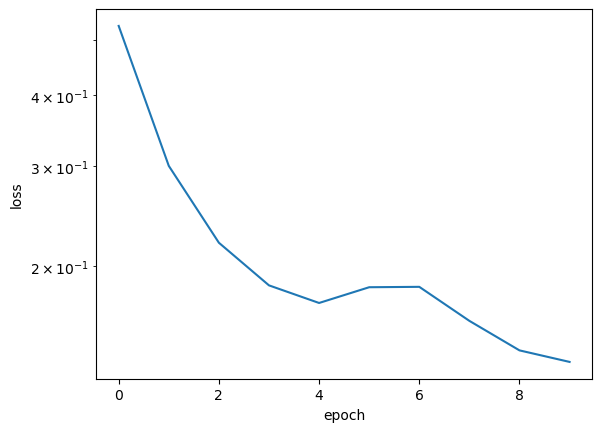

In [11]:
plt.figure()
plt.ylabel('loss')
plt.xlabel('epoch')
plt.semilogy(history.history['loss'])

In [14]:
testresult = m.evaluate(X_test, y_test, batch_size = 50, verbose = 1)

351/351 [==============================] - 4s 10ms/step - loss: 0.1078


In [36]:
testresult2 = m.predict(mtestset)

418/418 [==============================] - 3s 7ms/step


In [16]:
np.shape(testresult2)

(17541, 5)

In [17]:
np.shape(y_test)

(17541, 5)

In [18]:
print(testresult2[1,:])
print(y_test[1,:])

[3.1706288e-03 7.0649505e-05 4.8585833e-05 5.7235984e-03 9.9098653e-01]
[0. 0. 0. 0. 1.]


In [19]:
np.argmax(testresult2[1,:])

4

In [37]:
score = 0
for i in range(13369):
    val2 = np.argmax(testresult2[i,:])
    if mtestsety[i,val2] == 1:
        score += 1
        
print(score/13369)

0.8975989228812925


In [38]:
testresult3 = m.predict(testset)

588/588 [==============================] - 4s 7ms/step


In [39]:
score = 0
for i in range(18816):
    val2 = np.argmax(testresult3[i,:])
    if newtestsety[i,val2] == 1:
        score += 1
        
print(score/18816)

0.9075255102040817
